<h1 style="text-align:center"><strong>Pima Indians Diabetes</strong>: Neural Networks</h1>
<h2><strong>1858893: </strong> Molefe Molefe</h2>
<p style="text-align:left">Pima Indians Dataset: <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a> </p>
<h3>Table of Contents</h3>


* [1. Data Exploration](#chapter2)
    * [Investigating Missing Values](#section_2_1)
    * [Dataset Summary Statistics](#section_2_2)
    * [Initial Audit](#section_2_3)
    * [Correlation Matrix](#section_2_4)
    * [Overview of Dataset](#section_2_5)
    * [Distribution of Glucose](#section_2_6)
    * [Distribution of BMI](#section_2_7)
    * [Pairplot](#section_2_8)
    * [Outcome Distribution](#section_2_9)
* [2. Exploring Different Effects of Activations](#chapter3)
    * [Dataset Standardization](#section_3_1)
    * [Hyperparameters](#section_3_2)
    * [Applying <strong>TanH</strong> Activation Function](#section_3_3)
    * [Applying <strong>ReLU</strong> Activation Function](#section_3_4)
    * [Applying <strong>Sigmoid</strong> Activation Function](#section_3_5)
    * [Visualizing Algorithm Performance With Confusion Matrices](#section_3_6)
    * [Speculating Model Performance Using <strong>AUC</strong> Curve](#section_3_7)
    * [Interpreting The <strong>Results</strong>](#section_3_8)
* [3. Exploring Different Effects of Layers and Nodes](#chapter4)
    * [<strong>Hyperparameters:</strong> 5 Layer Network](#section_4_1)
    * [<strong>Hyperparameters:</strong> 5 Layer Network](#section_4_2)
    * [<strong>Hyperparameters:</strong> 7 Layer Network](#section_4_3)
 * [4. <strong>Accuracy:</strong> Reporting The Final Score](#chapter5)
    * [<strong>Sigmoid:</strong> Final Results](#section_5_1)
    * [<strong>Tanh:</strong> Final Results](#section_5_2)



# About Dataset:
* <strong>Pregnancies</strong>: No. of times pregnant
* <strong>Glucose</strong>: Plasma Glucose Concentration (mg/dl)
* <strong>Blood Pressure</strong>: Diastolic Blood Pressure(mmHg)
* <strong>Skin Thickness</strong>:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.
* <strong>Insulin</strong>: 2-Hour Serum Insulin (mu U/ml)
* <strong>BMI: Body Mass Index </strong>: (weight in kg/ height in m2)
* <strong>Diabetes Pedigree Function </strong>: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
* <strong>Age</strong>:Age (years)
* <strong>Outcome</strong>: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import neuralnetworks as nn
import results as rr
# from tqdm.keras import TqdmCallback
import warnings
warnings.filterwarnings('ignore')


<a id="chapter2" name="chapter2"></a>

<h2 style="text-align:center;color:lightcoral"><strong>1. Data Exploration</strong>: Pima Indians</h2> 

> <strong>Cleaning</strong>: Correct Datatype, Missing Data, Outliers

> <strong>Basis Descriptive Statistics</strong>: Average, Means,

> <strong>Train-Test-Split</strong>: 60%-Training 40%-Testing

<a id="section_2_1" name="section_2_1"></a>

<h3 style="color:lightcoral">Investigating Missing Values</h3

In [2]:
dataset = pd.read_csv('diabetes.csv')
missing_ = pd.DataFrame(dataset.isnull().sum())
missing_.rename(columns={0:"Missing Values"},inplace=True)
missing_

,Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<a id="section_2_2" name="section_2_2"></a>

<h3 style="color:lightcoral">Dataset Summary Statistics</h3>

In [3]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]
means_ = pd.DataFrame(X.mean())
means_.rename(columns={0:"Means"},inplace=True)
means_

,Means
Pregnancies,3.845052
Glucose,120.894531
BloodPressure,69.105469
SkinThickness,20.536458
Insulin,79.799479
BMI,31.992578
DiabetesPedigreeFunction,0.471876
Age,33.240885


<a id="section_2_3" name="section_2_3"></a>

<h3 style="color:lightcoral">Initial Audit</h3>

> <strong>Features/Column Totals</strong> :8

> <strong>Types</strong>: Float64/Int64

> <strong>Number of Duplicates</strong>: 0

In [4]:
print("Duplicates:",len(dataset[dataset.duplicated(keep=False)]))
dataset.info()

Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataset.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<a id="section_2_4" name="section_2_4"></a>

<h3 style="color:lightcoral">Correlation Matrix </h3>
The relationship exhibited between variables, collected in a correlation matrix, helps us understand how variables interact relative to each other.

In [7]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


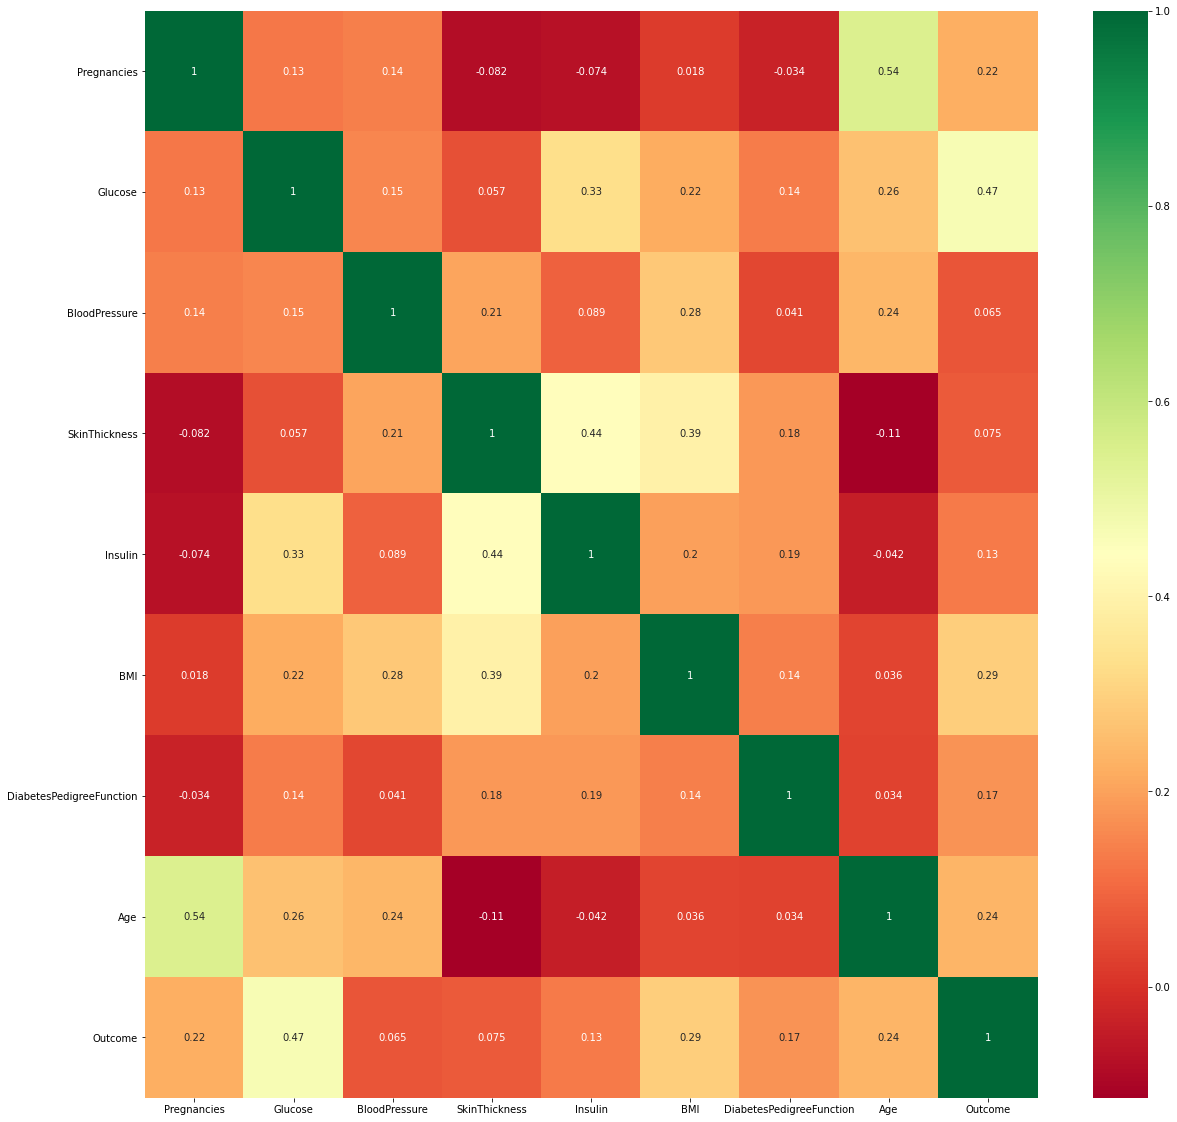

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<a id="section_2_5" name="section_2_5"></a>

<h3 style="color:lightcoral">Overview of Dataset</h3>


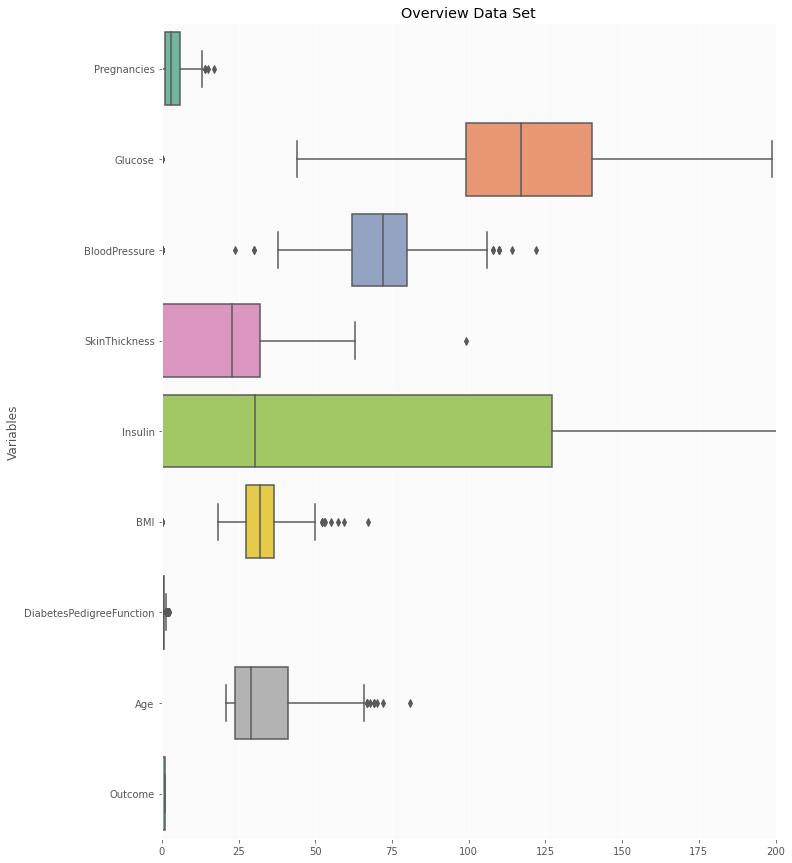

In [9]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = dataset, orient = 'h', palette = 'Set2')

<a id="section_2_6" name="section_2_6"></a>

<h3 style='color:lightcoral'>Distribution of Glucose</h3>


(<AxesSubplot:>, <AxesSubplot:>)

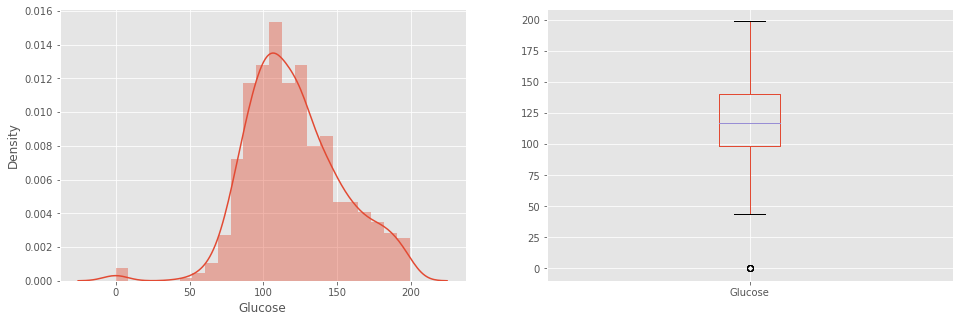

In [10]:
plt.subplot(121),sns.distplot(dataset['Glucose'])
plt.subplot(122),dataset['Glucose'].plot.box(figsize=(16,5))

<h3 style='color:lightcoral'>Distribution of BMI</h3>


(<AxesSubplot:>, <AxesSubplot:>)

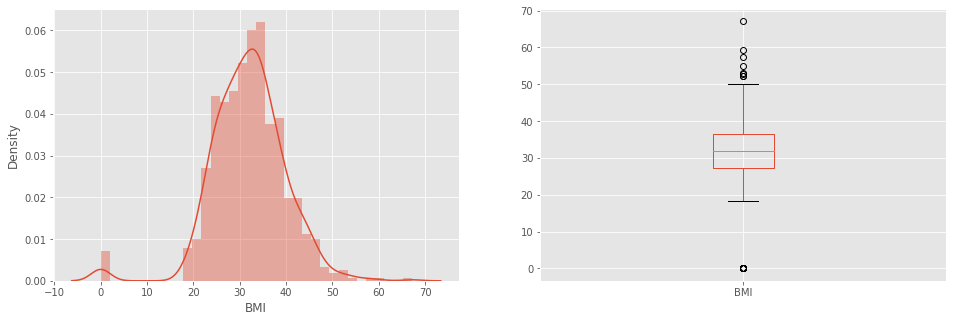

In [11]:
plt.subplot(121),sns.distplot(dataset['BMI'])
plt.subplot(122),dataset['BMI'].plot.box(figsize=(16,5))

<a id="section_2_8" name="section_2_8"></a>

<h3 style='color:lightcoral'>Pairplot</h3>
Pairplots plot pairwise relationships represented in a grid corresponding to a variable correlated with every other variable.

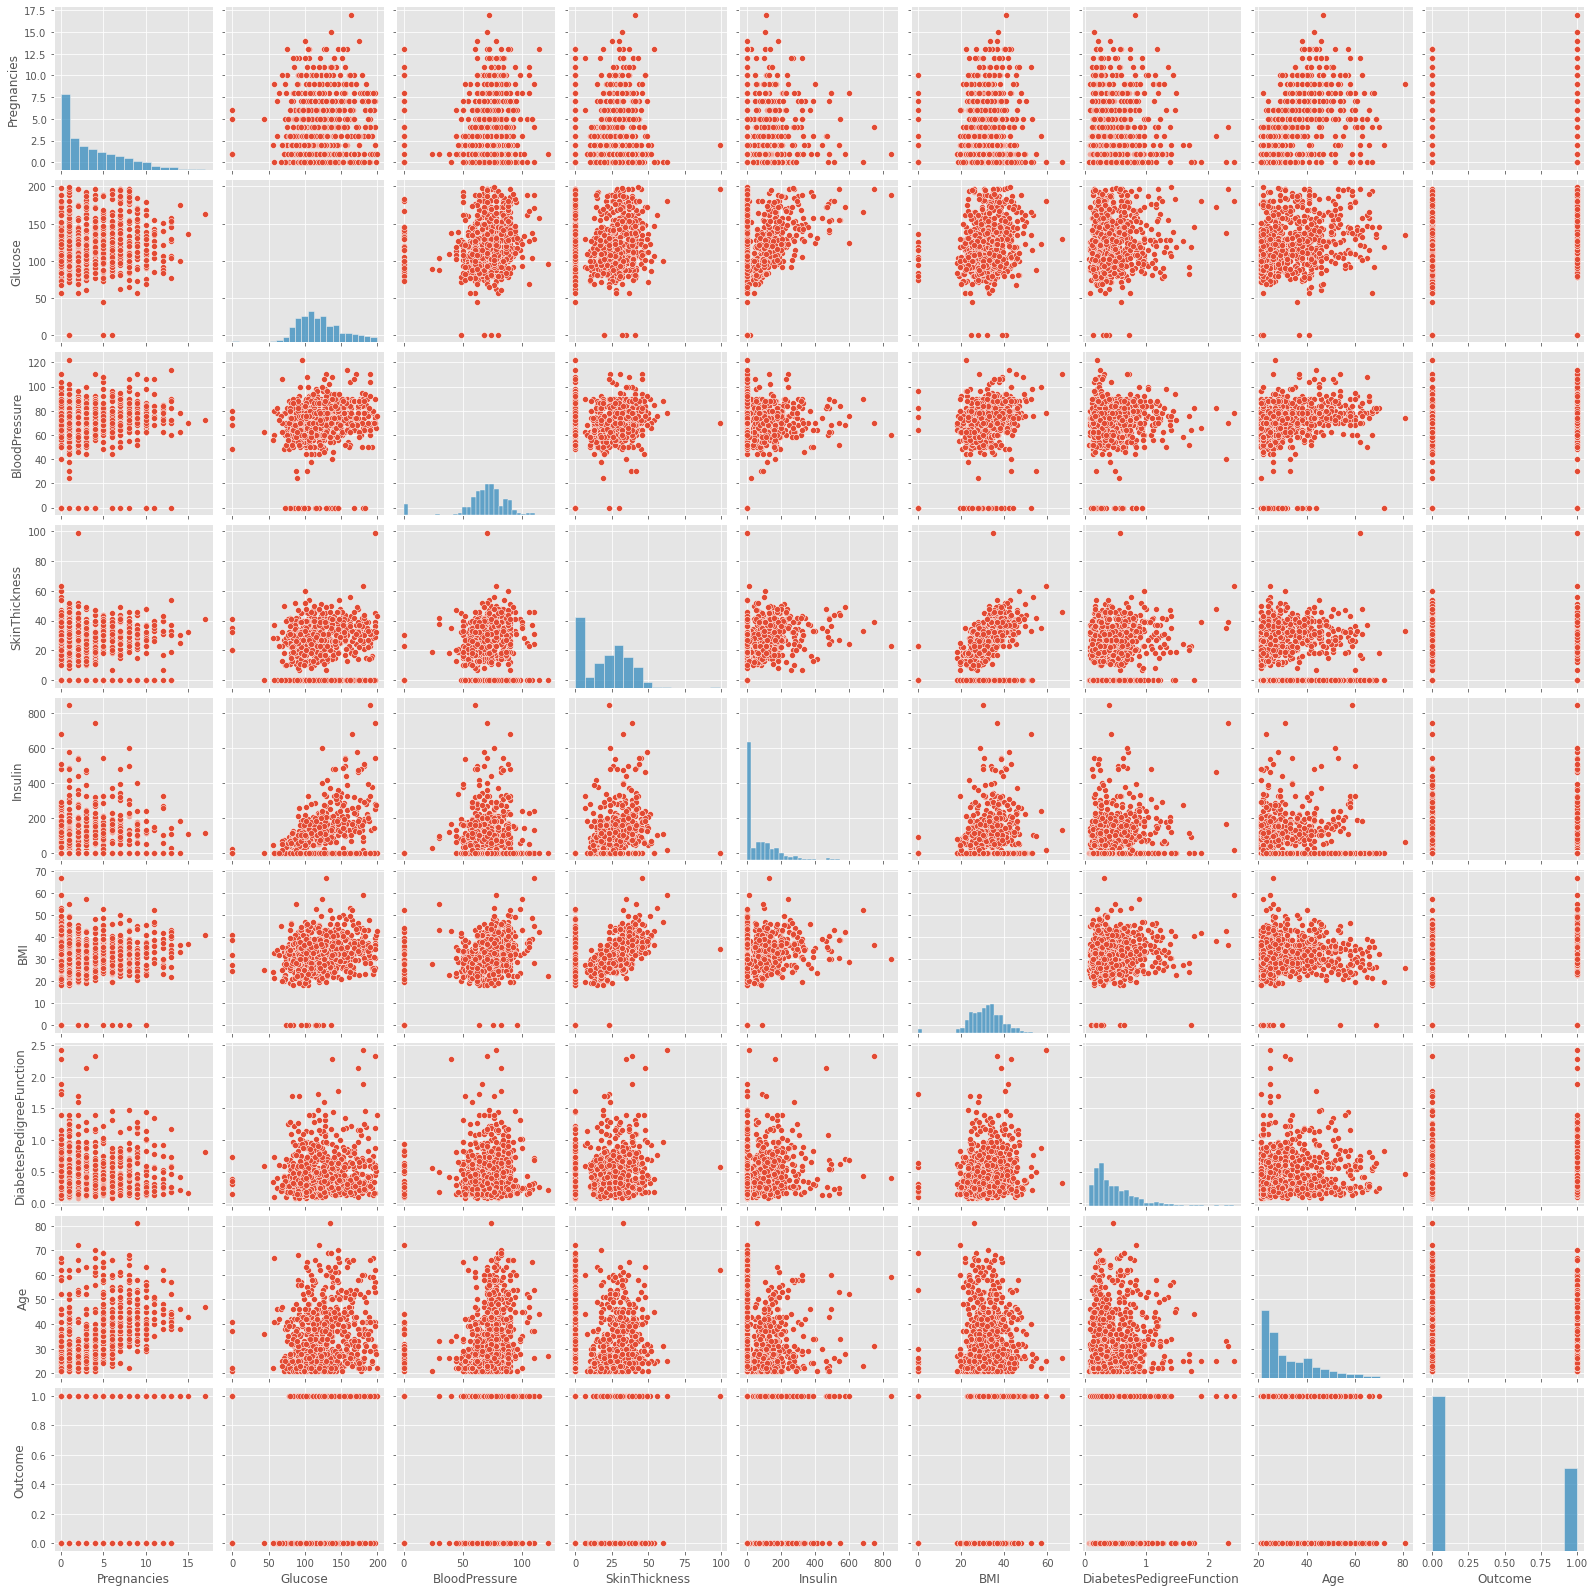

In [12]:
sns.pairplot(dataset)

<a id="section_2_9" name="section_2_9"></a>


<h3 style="color:lightcoral">Outcome Distribution</h3>
The following plot gives insight into the outcome distribution.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

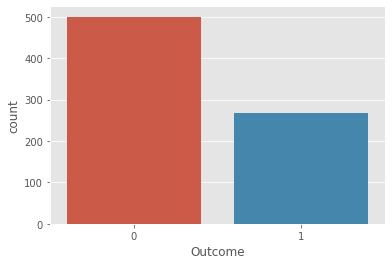

In [13]:
sns.countplot(x="Outcome",data=dataset)

<a id="chapter3" name="chapter3"></a>

<h2 style="text-align:center;color:lightcoral"><strong>2. Exploring Different Effects of Activation Functions</strong></h2>
We will be exploring how the neural network performs when given different activation functions

In [14]:
dataset = dataset.sample(frac=1)
train_ = dataset.iloc[:len(dataset) * 60//100,:]
train_.insert(len(train_.columns)-1,"Bias",[1 for i in range(len(train_))],True)
test_ = dataset.iloc[len(dataset) * 60//100:,:]
test_.insert(len(test_.columns)-1,"Bias",[1 for i in range(len(test_))],True)

<a id="section_3_1" name="section_3_1"></a>

<h3 style="color:lightcoral">Dataset Standardization</h3>


In [15]:
trainX = train_.iloc[:,:-1]
trainY = train_.iloc[:,-1]
testX = test_.iloc[:,:-1]
testY = test_.iloc[:,-1]
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(trainX)
scaler_test = preprocessing.StandardScaler().fit(testX)
X_scaled = scaler.transform(trainX) 
X_scaled_test = scaler_test.transform(testX)

<a id="section_3_2" name="section_3_2"></a>


<h3 style="color:lightcoral">Hyperparameters</h3>

> <strong>Nodes </strong> = ( 9 , 4 , 4 , 1 )

> <strong>First Layer</strong>: 8 nodes + 1 bias node

> <strong>Second Layer</strong>: 3 nodes + 1 bias node

> <strong>Third Layer</strong>: 3 nodes + 1 bias node

> <strong>Fourth Layer</strong>: 1 output node

> <strong>Alpha</strong>: 0.9

> <strong>Lambda</strong>: 0.01


<img src='nn.svg'/>

In [16]:
epoch = 100
alpha = 0.9
lambda_ = 0.01
nodes = [9,4,4,1]

<a id="section_3_3" name="section_3_3"></a>


<h3 style="color:lightcoral">Applying <strong>TanH</strong> Activation Function </h3>
The following applies <strong>basic implementation</strong> of neural network backpropagation with gradient descent to generate thetas.
The accuracy presented below is not reliable enough to convincingly distinguish whether a patient has diabetes. The result generated below merely compares the output and prediction. Our concern is more centered around determining whether a patient indeed has diabetes. Hence, including the correct prediction that the patient <strong>does not</strong> have diabetes will not give an indication of whether our algorithm can correctly determine whether a patient has diabetes.

In [17]:
tanh_dataset,tanh_result = nn.model(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'tanh',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100)
tanh_result

71.75324675324676

<a id="section_3_4" name="section_3_4"></a>

<h3 style="color:lightcoral">Applying <strong>ReLU</strong> Activation Function </h3>

In [18]:
relu_dataset,relu_result = nn.model(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'relu',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100)
relu_result

35.714285714285715

<a id="section_3_5" name="section_3_5"></a>

<h3 style="color:lightcoral">Applying <strong>Sigmoid</strong> Activation Function </h3>

In [19]:
sigmoid_dataset,sigmoid_result = nn.model(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'sigmoid',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100)
sigmoid_result

70.45454545454545

In [20]:
models = [tanh_dataset,relu_dataset,sigmoid_dataset]
model_titles = ["Tanh","ReLU","Sigmoid"]

<a id="section_3_6" name="section_3_6"></a>


<h3 style="color:lightcoral">Visualizing Algorithm Performance With Confusion Matrices</h3>
A confusion matrix is a table used to describe the performance of a classification model on a set of test data.

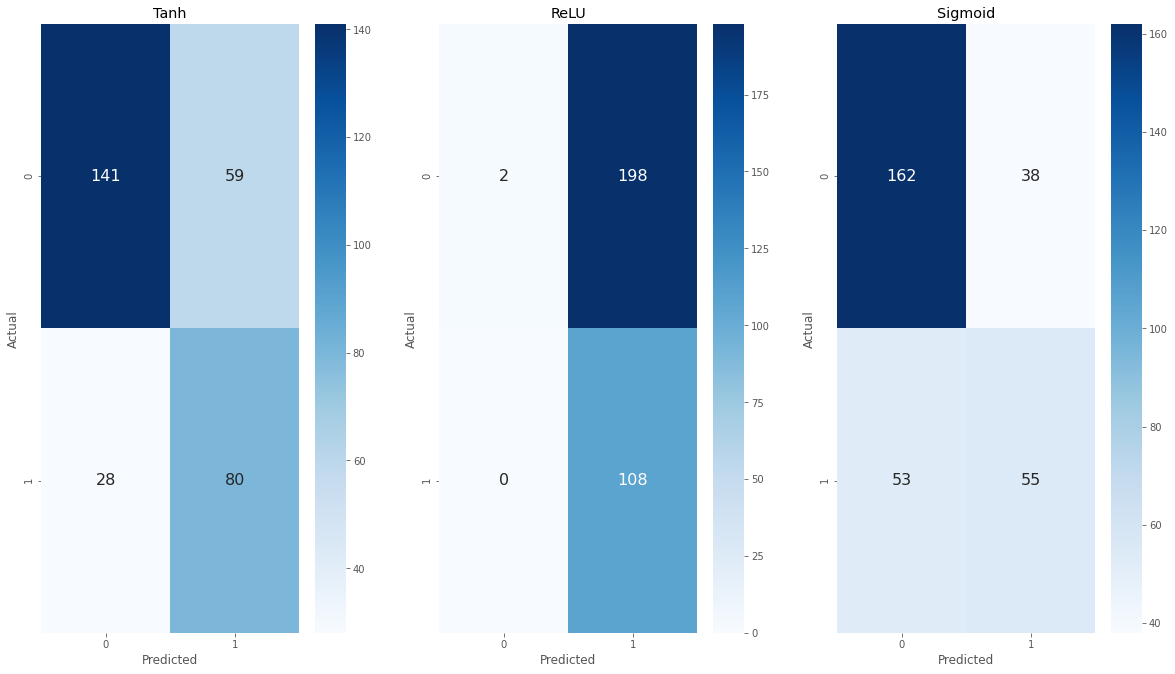

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,10))

for i in range(len(axes)):
    axes[i].title.set_text(model_titles[i])
    data = confusion_matrix(models[i].loc[:,'Outcome'],models[i].loc[:,'Predictions'])
    df_cm = pd.DataFrame(data, columns=np.unique(models[i].loc[:,'Outcome']), index = np.unique(models[i].loc[:,'Predictions']))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',ax=axes[i])# font si

fig.tight_layout(pad=3.0)

<a id="section_3_7" name="section_3_7"></a>

<h3 style='color:lightcoral'>Speculating Model Performance Using <strong>AUC</strong> Curve</h3>
AUC curves describe the performance of a classification model at various threshold settings. ROC represents the probability curve and AUC(Area Under The Curve) represents the degree of separability. An excellent model has AUC near 1, inferring that the model has a good measure of separability. In other words, we are more concerned with how likely our model is to correctly predict whether someone does have diabetes or not.

In [22]:
auc_scores,fpr_roc_curves,p_fpr_curves = rr.AUC_Scores(model_titles,models)

<a id="section_3_8" name="section_3_8"></a>


<h3 style='color:lightcoral'>Interpreting The <strong>Results</strong></h3>
The below ROC curve shows that the <strong style='color:lightcoral'>TanH</strong> function chosen as an activation function outperforms both ReLU and Sigmoid. We can see this clearly because the function that leans closer to one, from the <i>True Positive Rate</i>, approximates a good measure of separability

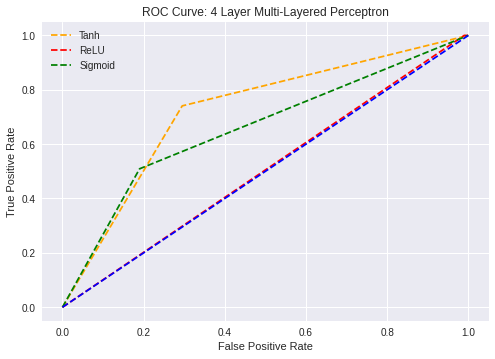

In [23]:
plt.style.use('seaborn')
# plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Neural Network')
plt.plot(fpr_roc_curves['Tanh'][0],fpr_roc_curves['Tanh'][1],linestyle='--',color='orange',label=model_titles[0])
plt.plot(fpr_roc_curves['ReLU'][0],fpr_roc_curves['ReLU'][1],linestyle='--',color='red',label=model_titles[1])
plt.plot(fpr_roc_curves['Sigmoid'][0],fpr_roc_curves['Sigmoid'][1],linestyle='--',color='green',label=model_titles[2])
plt.plot(p_fpr_curves['Sigmoid'][0],p_fpr_curves['Sigmoid'][1],linestyle='--',color='blue')
plt.title('ROC Curve: 4 Layer Multi-Layered Perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


<a id="chapter4" name="chapter4"></a>

<h2 style="text-align:center;color:lightcoral"><strong>3. Exploring Different Effects of Layers and Nodes </strong></h2>
We will be exploring how the neural network performs when given different amount of layers and nodes

<a id="section_4_1" name="section_4_1"></a>


<h3 style="color:lightcoral"><strong>Hyperparameters:</strong> 5 Layer Network</h3>
<h4>Each Hidden layer has 4 nodes</h4>

> <strong>Nodes </strong> = ( 9 , 4 , 4 , 4, 1 )

> <strong>First Layer</strong>: 8 nodes + 1 bias node

> <strong>Second Layer</strong>: 3 nodes + 1 bias node

> <strong>Third Layer</strong>: 3 nodes + 1 bias node

> <strong>Fourth Layer</strong>: 3 nodes + 1 bias node

> <strong>Fifth Layer</strong>: 1 output node

> <strong>Alpha</strong>: 0.9

> <strong>Lambda</strong>: 0.01

In [24]:
epoch = 100
alpha = 0.9
lambda_ = 0.01
nodes = [9,4,4,4,1]


In [25]:
sigmoid_dataset,sigmoid_result = nn.model(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'sigmoid',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100)
print("Results of Using a {} Layered MLP with 4 Nodes In Each Hidden Layer: ".format(len(nodes)),sigmoid_result)

Results of Using a 5 Layered MLP with 4 Nodes In Each Hidden Layer:  73.37662337662337


<a id="section_4_2" name="section_4_2"></a>


<h3 style="color:lightcoral"><strong>Hyperparameters:</strong> 5 Layer Network</h3>
<h4>Each Hidden layer has 5 nodes</h4>

> <strong>Nodes </strong> = ( 9 , 4 , 4 , 4, 1 )

> <strong>First Layer</strong>: 8 nodes + 1 bias node

> <strong>Second Layer</strong>: 3 nodes + 1 bias node

> <strong>Third Layer</strong>: 3 nodes + 1 bias node

> <strong>Fourth Layer</strong>: 3 nodes + 1 bias node

> <strong>Fifth Layer</strong>: 1 output node

> <strong>Alpha</strong>: 0.9

> <strong>Lambda</strong>: 0.01

In [26]:
epoch = 100
alpha = 0.9
lambda_ = 0.01
nodes = [9,5,5,5,1] # 5 Layers - Input Layer[9 Nodes] First Hidden Layer[5 Nodes] Second Hidden Layer[5 Nodes] Third Hidden Layer[5 Nodes] Output Layer[1 Node]


In [27]:
sigmoid_dataset,sigmoid_result = nn.model(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'sigmoid',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100)
print("Results of Using a {} Layered MLP with 5 Nodes In Each Hidden Layer: ".format(len(nodes)),sigmoid_result)

Results of Using a 5 Layered MLP with 5 Nodes In Each Hidden Layer:  72.40259740259741


<a id="section_4_3" name="section_4_3"></a>


<h3 style="color:lightcoral"><strong>Hyperparameters:</strong> 7 Layer Network</h3>
<h4>Each Hidden layer has 2 nodes</h4>

> <strong>Nodes </strong> = ( 9 , 2 , 2 , 2 , 2 , 2 , 1 )

> <strong>First Layer</strong>: 8 nodes + 1 bias node

> <strong>Second Layer</strong>: 1 nodes + 1 bias node

> <strong>Third Layer</strong>: 1 nodes + 1 bias node

> <strong>Fourth Layer</strong>: 1 nodes + 1 bias node

> <strong>Fifth Layer</strong>: 1 nodes + 1 bias node

> <strong>Sixth Layer</strong>: 1 nodes + 1 bias node

> <strong>Seventh Layer</strong>: 1 output node

> <strong>Alpha</strong>: 0.9

> <strong>Lambda</strong>: 0.01

In [28]:
epoch = 100
alpha = 0.9
lambda_ = 0.01
nodes = [9,2,2,2,2,2,1] # 5 Layers - Input Layer[9 Nodes] First Hidden Layer[5 Nodes] Second Hidden Layer[5 Nodes] Third Hidden Layer[5 Nodes] Output Layer[1 Node]


In [29]:
sigmoid_dataset,sigmoid_result = nn.model(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'sigmoid',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100)
print("Results of Using a {} Layered MLP with 2 Nodes In Each Hidden Layer: ".format(len(nodes)),sigmoid_result)

Results of Using a 7 Layered MLP with 2 Nodes In Each Hidden Layer:  64.93506493506493


<a id="chapter5" name="chapter5"></a>

<h2 style="text-align:center;color:lightcoral"><strong>4. <strong>Accuracy:</strong> Reporting The Final Score</strong></h2>
An algorithm will generate different results with each iteration. However, we can achieve reliable scores by averating the results generated from each iteration. In this instance, we have run the algorithm 10 times and collected the general score.

In [30]:
epoch = 100
alpha = 0.9
lambda_ = 0.01
nodes = [9,4,4,1]

<a id="section_5_1" name="section_5_1"></a>

<h3 style="color:lightcoral"><strong>Sigmoid:</strong> Final Results</h3>


In [31]:
averages,average = rr.average_results(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'sigmoid',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100,avg_run=10)
average

72.33766233766234

<a id="section_5_2" name="section_5_2"></a>

<h3 style="color:lightcoral"><strong>Tanh:</strong> Final Results</h3>


In [33]:
tanh_averages,tan_average = rr.average_results(X_scaled,X_scaled_test,test_,trainY,nodes,n_types = 'tanh',last_type='sigmoid',alpha=0.9,lambda_=0.01,epoch=100,avg_run=10)
tan_average

56.753246753246756

When running the final results, we will see that <strong>Sigmoid</strong> tends to average results better